<a href="https://colab.research.google.com/github/Rashi2011/Rashi-Madhukar/blob/master/Programs%20in%20Tensorflow/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This is a Multiclass Dataset therefor we have to take 1st class as 1 and rest as 0 , then again only 2nd class is as 1 and rest all as 0 , and so on... ***


In [ ]:
#importing the libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:

#Loading the data(mnist_data)
path = "/content/drive/My Drive/Colab Notebooks/Dataset/mnist_test.csv"
data = pd.read_csv(path)
print(data.shape)
X = data.iloc[:,1:785].values
Y = data.iloc[:,0].values
print(X.shape,Y.shape)


(9999, 785)
(9999, 784) (9999,)


In [ ]:
from sklearn.model_selection import train_test_split
train_img,test_img,train_labels,test_labels = train_test_split(X,Y,test_size = 0.2,random_state = 0)
#Reshaping the data
train_img = train_img/255.0
test_img = test_img/255.0
train_img = train_img.reshape(train_img.shape + (1,))
test_img = test_img.reshape(test_img.shape + (1,))
print(train_img.shape,train_labels.shape,test_img.shape,test_labels)



(7999, 784, 1) (7999,) (2000, 784, 1) [7 8 7 ... 1 2 6]


In [ ]:

#Designing the simple model
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (784,1)),
                             tf.keras.layers.Dense(128,activation='relu'),#128 is output of the fully connected layer after flattening
                             tf.keras.layers.Dense(10,activation = 'softmax')
])


In [ ]:
#Designing a Convolution Model
'''
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax'),
                             
])
'''

"\nmodel_2 = tf.keras.Sequential([\n                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(28,28,1)),\n                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),\n                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),\n                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),\n                             tf.keras.layers.Flatten(),\n                             tf.keras.layers.Dense(128,activation = 'relu'),\n                             tf.keras.layers.Dense(10, activation = 'softmax'),\n                             tf.keras.layers.Dense(1,activation = 'sigmoid')\n])\n"

In [ ]:

#Optimization and Loss computation
model_1.compile(optimizer = tf.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics = ['acc'] )

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model(Training the model)
history = model_1.fit(train_img, train_labels,batch_size = 4,epochs=5)


Epoch 1/5
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0074 - acc: 0.9982
Epoch 2/5
2000/2000 [==============================] - 3s 1ms/step - loss: 5.4676e-04 - acc: 0.9999
Epoch 3/5
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0024 - acc: 0.9995
Epoch 4/5
2000/2000 [==============================] - 3s 1ms/step - loss: 0.0106 - acc: 0.9969
Epoch 5/5
2000/2000 [==============================] - 3s 1ms/step - loss: 4.1259e-04 - acc: 0.9999


In [ ]:
#evaluation/Prediction
model_1.evaluate(test_img,test_labels,batch_size= 10, verbose= 2)



200/200 - 0s - loss: 0.2356 - acc: 0.9690


[0.23560971021652222, 0.968999981880188]

<Figure size 432x288 with 0 Axes>

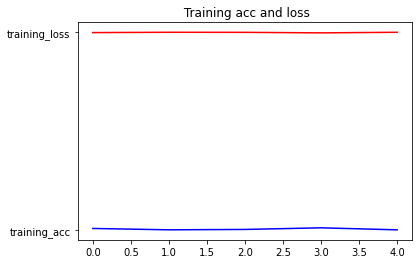

<Figure size 432x288 with 0 Axes>

In [ ]:
#libraries
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Creating List
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

#Plotting Training loss and accuracy
plt.plot(epochs,acc,'r','training_acc')
plt.plot(epochs,loss,'b','training_loss')
plt.title(' Training acc and loss')
plt.figure()


